
Grouped key: Cocacola
    company Person  Sales
4  Cocacola  Sarah    350 


Grouped key: FB
  company   Person  Sales
3      FB  Vanessa    245 


Grouped key: Google
  company Person  Sales
0  Google    Sam    200 


Grouped key: MSFT
  company Person  Sales
2    MSFT    Amy    340 


Grouped key: Nvidia
  company   Person  Sales
1  Nvidia  Charlie    210 


Grouped key: United Arline
         company Person  Sales
5  United Arline   Carl    124 

                Person  Sales
company                      
Cocacola         Sarah    350
FB             Vanessa    245
Google             Sam    200
MSFT               Amy    340
Nvidia         Charlie    210
United Arline     Carl    124
     A      B         C         D       sum
0  foo    one -0.051167  0.703207  0.652040
1  bar    one -0.216595  0.378441  0.161845
2  foo    two -0.341351 -2.505293 -2.846644
3  bar  three  0.190699 -0.699452 -0.508753
4  foo    two  1.478628 -2.053059 -0.574430
5  foo    two -1.328541 -1.471013 -2.7995

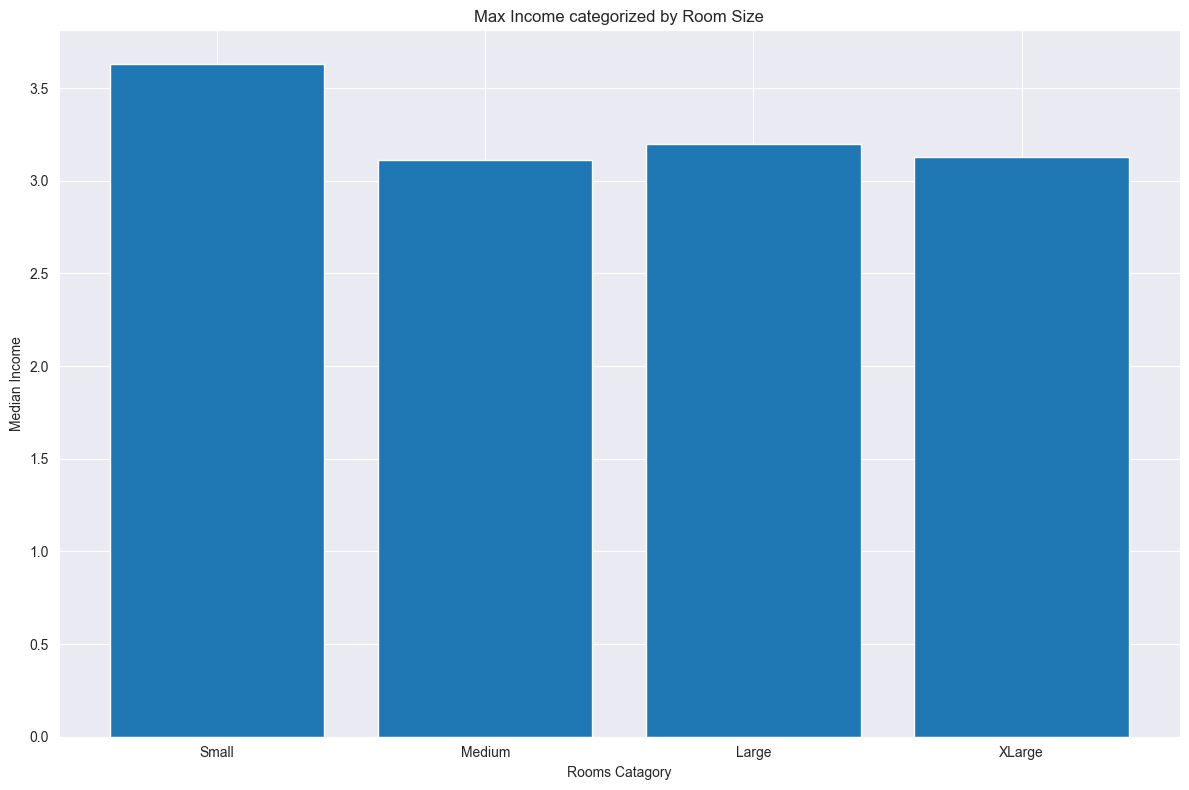

In [11]:
#groupby function is used to sort large sales data by product categoris and apply function can be used to calculate the revenue
#of this categories
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
#ignore all warnings
warnings.filterwarnings('ignore')

#create a simple dataframe
data = {'company': ['Google', 'Nvidia', 'MSFT', 'FB', 'Cocacola', 'United Arline'],
        'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Sarah', 'Carl'],
        'Sales': [200, 210, 340, 245,350,124]}
df = pd.DataFrame(data)
#apply groupby
df_grouped = df.groupby('company')
for key, item in df_grouped:
    print("\nGrouped key: {}".format(key))
    print(df_grouped.get_group(key), "\n")
print(df_grouped.sum()) #returns the company name , the ceo and sales of each company
data2 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'foo','bar','foo'],
                      'B':['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                      'C': np.random.randn(8),
                      'D': np.random.randn(8)})
#Define a function
def get_sum(row):
    return row.sum()
#select column C and D and apply the get sum function and apply it in row-wise format
data2['sum'] = data2[['C', 'D']].apply(get_sum, axis=1)
print(data2)
#finding the maximum sales for each company
print(df.groupby('company').apply(lambda x : x['Sales'].max()))

#fetch the dataset
data3 = fetch_california_housing(as_frame=True) #retrieve the dataset as Pandas DataFrame accessible via the FRAME Attribute  of the returned Bunch Object
#The data is already in a data Frame format
housing_df = data3.frame

#categorizing incomes into different categoris with pd.cut()
#apply lambda calculates the average population for each income category
housing_df['income_cat'] = pd.cut(housing_df['MedInc'],
                                  bins=[0.,1.5,3.0,4.5,6.,np.inf],
                                  labels=[1,2,3,4,5])
#Group by income category and calculate the average population
average_populations = housing_df.groupby('income_cat').apply(lambda x: x['Population'].mean())
print(average_populations)


#creating a data frame
data_df = pd.DataFrame(data=data3.data, columns=data3.feature_names)

#create new feature called varagebd
data_df['averageBedroomPerUnit'] = data_df['AveBedrms']/ data_df['AveOccup']

#getting a room size  using the Average
data_df['RoomSize'] = pd.cut(data_df["averageBedroomPerUnit"], bins =[0.0, 0.5, 1.0, 1.5, np.inf],
                             labels=['Small', 'Medium', 'Large', 'XLarge']) #labers are assigned to different looms
print(data_df.head())
#calculate the median income
max_income = data_df.groupby('RoomSize').apply(lambda x: x['MedInc'].median())
print(max_income.values)
print(max_income.index)
fig, ax= plt.subplots(figsize=(12,8))
plt.bar(max_income.index, max_income.values)
ax.set_title("Max Income categorized by Room Size")
ax.set_xlabel('Rooms Catagory')
ax.set_ylabel('Median Income')
#adjust layout
plt.tight_layout()
plt.show()